In [1]:
# Import important modules

import numpy as np
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import pandas as pd
import re

# Import Huggingface API

In [2]:
from huggingface_hub import notebook_login

notebook_login()

# Import Huggingface transformers for the models

In [42]:
# Import GPT-2 Model and Tokenizer
from transformers import GPT2Model, GPT2Tokenizer
gpt2 = GPT2Model.from_pretrained('gpt2')
tokenizer_gpt2 = GPT2Tokenizer.from_pretrained('gpt2')
embeddings_gpt2 = gpt2.wte.weight.detach().numpy()

In [43]:
# Import BERT Model and Tokenizer
from transformers import BertModel, BertTokenizer
bert = BertModel.from_pretrained('bert-base-uncased')
tokenizer_bert = BertTokenizer.from_pretrained('bert-base-uncased')
embeddings_bert = bert.embeddings.word_embeddings.weight.detach().numpy()

# Get the individual token lengths from the models

In [6]:
token_lengths = np.zeros(tokenizer_gpt2.vocab_size, dtype=int)
for i in range(tokenizer_gpt2.vocab_size):
    token_lengths[i] = len(tokenizer_gpt2.decode([i]))

uniqueLengths_gpt2, token_count_gpt2 = np.unique(token_lengths, return_counts=True)

print('GPT-2 Token Lenghts', token_lengths)

token_lengths = np.zeros(tokenizer_bert.vocab_size, dtype=int)
for i in range(tokenizer_bert.vocab_size):
    token_lengths[i] = len(tokenizer_bert.decode([i]))

uniqueLengths_bert, token_count_bert = np.unique(token_lengths, return_counts=True)

print('BERT Token Lenghts', token_lengths)


GPT-2 Token Lenghts [ 1  1  1 ... 11  6 13]
BERT Token Lenghts [5 9 9 ... 3 3 3]


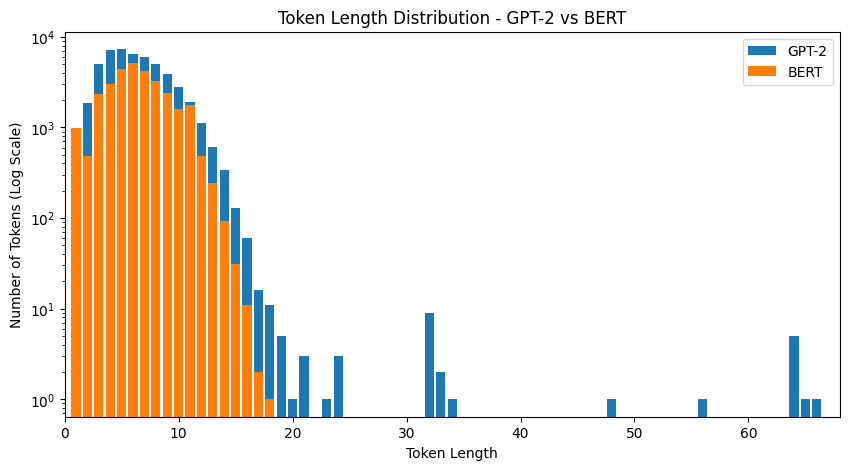

In [10]:
import matplotlib.pyplot as plt

# Plot the token lengths
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(uniqueLengths_gpt2, token_count_gpt2, label='GPT-2')
ax.bar(uniqueLengths_bert, token_count_bert, label='BERT')
ax.set_xlabel('Token Length')
ax.set_ylabel('Number of Tokens (Log Scale)')
ax.set_title('Token Length Distribution - GPT-2 vs BERT')
ax.set_yscale('log') # Set y-axis to logarithmic scale
ax.legend()

# Set x-axis limits to ensure all bars are visible
max_length = max(uniqueLengths_gpt2.max(), uniqueLengths_bert.max())
ax.set_xlim(0, max_length + 2) # Adding a small buffer for better visualization

plt.show()

# Analyze the patterns of tokens for numbers

In [49]:
nums_array = np.concatenate([np.linspace(0,9,10).astype(int), np.linspace(10,100,10).astype(int), np.linspace(200,1000,9).astype(int)]).tolist()

gpt2_token_nums = {nums_array[i]:tokenizer_gpt2.encode(str(nums_array[i])) for i in range(len(nums_array))}

bert_token_nums = {nums_array[i]:tokenizer_bert.encode(str(nums_array[i])) for i in range(len(nums_array))}

In [55]:
for key in gpt2_token_nums:
    print(f' The number {key:>5} is {str(gpt2_token_nums[key]):>9}')

 The number     0 is      [15]
 The number     1 is      [16]
 The number     2 is      [17]
 The number     3 is      [18]
 The number     4 is      [19]
 The number     5 is      [20]
 The number     6 is      [21]
 The number     7 is      [22]
 The number     8 is      [23]
 The number     9 is      [24]
 The number    10 is     [940]
 The number    20 is    [1238]
 The number    30 is    [1270]
 The number    40 is    [1821]
 The number    50 is    [1120]
 The number    60 is    [1899]
 The number    70 is    [2154]
 The number    80 is    [1795]
 The number    90 is    [3829]
 The number   100 is    [3064]
 The number   200 is    [2167]
 The number   300 is    [6200]
 The number   400 is    [7029]
 The number   500 is    [4059]
 The number   600 is    [8054]
 The number   700 is    [9879]
 The number   800 is    [7410]
 The number   900 is   [12865]
 The number  1000 is   [12825]


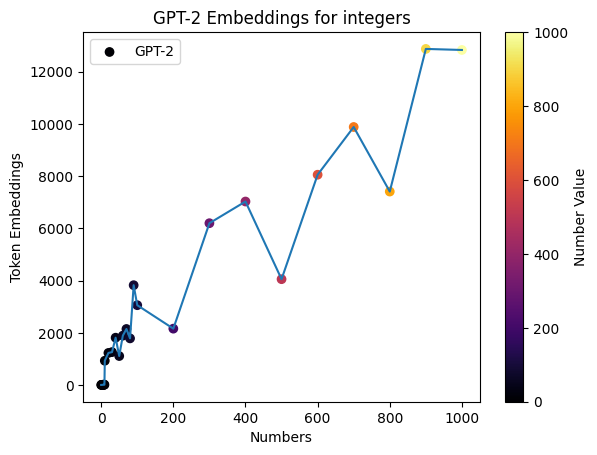

In [76]:
plt.scatter(list(gpt2_token_nums.keys()), [v[0] for v in gpt2_token_nums.values()], c=list(gpt2_token_nums.keys()), cmap='inferno', label='GPT-2')
plt.plot(list(gpt2_token_nums.keys()), [v[0] for v in gpt2_token_nums.values()])
plt.gca().set(xlabel="Numbers",ylabel="Token Embeddings", title='GPT-2 Embeddings for integers')
plt.colorbar(label='Number Value') # Add a colorbar to explain the color mapping
plt.legend()
plt.show()

In [85]:
n = 10.5**5
tokenizer_gpt2(str(n))

{'input_ids': [3064, 830], 'attention_mask': [1, 1]}